In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, r2_score, mean_squared_error, classification_report
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from datetime import datetime
import time
import statistics

In [130]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [215]:
f1  = pd.read_csv('/content/drive/MyDrive/project6/stocknet_trn_data.csv')
f2 = pd.read_csv('/content/drive/MyDrive/project6/stocknet_trn_data_targets.csv',header = None)
f2 = f2.drop([0], axis = 1)
f3 = pd.read_csv('/content/drive/MyDrive/project6/stocknet_tst_data.csv')


In [216]:
f2 = f2.drop([7642, 46002, 61502], axis = 0)
f1 = f1.drop([7642, 46002, 61502], axis = 0)
np.where(np.isnan(f2))

(array([], dtype=int64), array([], dtype=int64))

In [217]:
fo1 = f1.copy()
fo3 = f3.copy()

In [218]:
nfo1 = fo1.copy()
nf2 = f2.copy()
nfo3 = fo3.copy()

In [211]:
f1["Traded Value"] = f1["Open"] * f1["Volume"] 
f1["HL Percent"] = (f1["High"] - f1["Low"]) / (f1["High"])

f3["Traded Value"] = f3["Open"] * f3["Volume"] 
f3["HL Percent"] = (f3["High"] - f3["Low"]) / (f3["High"])

In [212]:
f4 = f1.copy()
f4["Close"] = f2

In [198]:
not_scaled_f1 = f1.copy()

In [137]:
scaler = StandardScaler()
scaler.fit(f4)
f5 = scaler.transform(f4)
df = pd.DataFrame(f5)

In [138]:
f4

,Open,High,Low,Volume,Traded Value,HL Percent,Close
0,75.430000,75.910004,75.139999,3436700.0,2.592303e+08,0.010144,75.650002
1,124.930000,124.940002,124.169998,2366700.0,2.956718e+08,0.006163,124.449997
2,84.339996,84.370003,82.370003,11338700.0,9.563059e+08,0.023705,82.660004
3,56.770000,57.150002,56.529999,413300.0,2.346304e+07,0.010849,57.009998
4,47.419998,48.090000,46.759998,9531100.0,4.519647e+08,0.027657,47.860001
...,...,...,...,...,...,...,...
97727,103.650002,103.809998,103.089996,3678200.0,3.812454e+08,0.006936,103.230003
97728,64.419998,64.730003,64.190002,20273100.0,1.305993e+09,0.008342,64.620003
97729,581.070007,581.400024,571.070007,3416500.0,1.985226e+09,0.017767,575.140015
97730,120.650002,120.650002,114.959999,13261700.0,1.600024e+09,0.047161,115.400002


In [139]:
df.corr()

,0,1,2,3,4,5,6
0,1.000000,0.999988,0.999988,-0.054682,0.070580,-0.055169,0.999974
1,0.999988,1.000000,0.999987,-0.054687,0.070740,-0.055021,0.999989
2,0.999988,0.999987,1.000000,-0.054680,0.070541,-0.055321,0.999988
3,-0.054682,-0.054687,-0.054680,1.000000,0.629466,0.161610,-0.054684
4,0.070580,0.070740,0.070541,0.629466,1.000000,0.148275,0.070689
5,-0.055169,-0.055021,-0.055321,0.161610,0.148275,1.000000,-0.055158
6,0.999974,0.999989,0.999988,-0.054684,0.070689,-0.055158,1.000000


In [140]:
scaler = MinMaxScaler()
f1_scaled=pd.DataFrame(scaler.fit_transform(fo1),columns=['Open', 'High', 'Low', 'Volume'])
X_sctrain,X_sctest,Y_sctrain,Y_sctest= train_test_split(f1_scaled,f2,test_size=0.20,random_state=42)

scaler_fo1 = StandardScaler()
fo1 = scaler_fo1.fit_transform(fo1)

scaler_fo3 = StandardScaler()
fo3 = scaler_fo3.fit_transform(fo3)

scaler_f1 = StandardScaler()
f1 = scaler_f1.fit_transform(f1)

scaler_f2 = StandardScaler()
f2 = scaler_f2.fit_transform(f2)

scaler_f3 = StandardScaler()
f3 = scaler_f3.fit_transform(f3)

**Metrics**

In [141]:
def RMSE(A,P):
  sum = 0
  for i in range(len(A)):
    sum = sum + (A[i] - P[i])**2
  error = math.sqrt((sum/len(A)))
  return error

def MAPE(A,P):
  sum = 0
  for i in range(len(A)):
     sum = sum+ abs((A[i] - P[i])/(A[i]))
  error = (sum / len(A))
  return error

def MBE(A,P):
  sum = 0
  for i in range(len(A)):
    sum = sum + abs(A[i] - P[i])
  error = sum/len(A)
  return error

def error_list(A,P,var):
  if var == 4:
    print("r2 score for 4 vars is: ", r2_score(A, P))
    print("RMSE score for 4 vars is: ", RMSE(np.array(A),np.array(P)))
    print("MAPE score for 4 vars is: ", MAPE(np.array(A),np.array(P)))
    print("MBE score for 4 vars is: ", MBE(np.array(A),np.array(P)))
  else:
    print("r2 score for 6 vars is: ", r2_score(A, P))
    print("RMSE score for 6 vars is: ", RMSE(np.array(A),np.array(P)))
    print("MAPE score for 6 vars is: ", MAPE(np.array(A),np.array(P)))
    print("MBE score for 6 vars is: ", MBE(np.array(A),np.array(P)))

# **Linear Regression**

In [142]:
fo_train, fo_test, f2_train, f2_test = train_test_split(fo1, f2, test_size = 0.2, random_state = 0)
linear_fo = LinearRegression().fit(fo_train, f2_train)
folr_pred = linear_fo.predict(fo_test)
error_list(f2_test, folr_pred,4)

f1_train, f1_test, f2_train, f2_test = train_test_split(f1, f2, test_size = 0.2, random_state = 0)
linear = LinearRegression().fit(f1_train, f2_train)
f2_pred = linear.predict(f1_test)
error_list(f2_test, f2_pred,6)


r2 score for 4 vars is:  0.9999899605438798
RMSE score for 4 vars is:  0.003110113530403698
MAPE score for 4 vars is:  [0.00021106]
MBE score for 4 vars is:  [0.00025577]
r2 score for 6 vars is:  0.9999899600073869
RMSE score for 6 vars is:  0.0031101966291004965
MAPE score for 6 vars is:  [0.00022861]
MBE score for 6 vars is:  [0.00025765]


# **Ridge Regression**

In [143]:
parameters = {'alpha':[1,0.1,0.01,0.001,0.0001,0],"fit_intercept": [True, False], 
              'solver': ['svd']}

Ridge_reg= GridSearchCV(Ridge(), param_grid = parameters,cv=5)
Ridge_reg.fit(fo_train,f2_train)
rr = Ridge_reg.best_estimator_
pred = rr.predict(fo_test)
error_list(f2_test, pred, 4)

Ridge_reg6= GridSearchCV(Ridge(), param_grid = parameters,cv=5)
Ridge_reg6.fit(f1_train,f2_train)
rr6 = Ridge_reg6.best_estimator_
pred6 = rr6.predict(f1_test)
error_list(f2_test, pred6, 6)


r2 score for 4 vars is:  0.9999899607223894
RMSE score for 4 vars is:  0.0031100858801088264
MAPE score for 4 vars is:  [0.00021453]
MBE score for 4 vars is:  [0.00025614]
r2 score for 6 vars is:  0.9999899601850045
RMSE score for 6 vars is:  0.0031101691177143525
MAPE score for 6 vars is:  [0.00022504]
MBE score for 6 vars is:  [0.00025724]


# **Lasso Regression**

In [144]:
param_lasso = {'alpha':[1,0.1,0.01,0.001,0.0001],"fit_intercept": [True, False]}

lasso_reg= GridSearchCV(Lasso(), param_grid = param_lasso,cv=5).fit(fo_train, f2_train)
lasso_pred = lasso_reg.predict(fo_test)
error_list(f2_test, pred, 4)


lasso_reg= GridSearchCV(Lasso(), param_grid = param_lasso,cv=5).fit(f1_train, f2_train)
lasso_pred = lasso_reg.predict(f1_test)
error_list(f2_test, pred6, 6)


r2 score for 4 vars is:  0.9999899607223894
RMSE score for 4 vars is:  0.0031100858801088264
MAPE score for 4 vars is:  [0.00021453]
MBE score for 4 vars is:  [0.00025614]
r2 score for 6 vars is:  0.9999899601850045
RMSE score for 6 vars is:  0.0031101691177143525
MAPE score for 6 vars is:  [0.00022504]
MBE score for 6 vars is:  [0.00025724]


# **Random Forest Regression**

In [145]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor(n_estimators = 30, random_state = 0).fit(fo_train,f2_train.ravel())
rt_pred = model_rfr.predict(fo_test)
error_list(f2_test, rt_pred,4)

r2 score for 4 vars is:  0.9999815596417985
RMSE score for 4 vars is:  0.004215080043042028
MAPE score for 4 vars is:  [0.00026429]
MBE score for 4 vars is:  [0.0003658]


# **KNN**

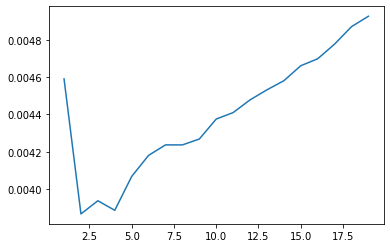

In [146]:
rms=[]
K_neighbor=[i for i in range(1,20)]
for K in K_neighbor:
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(fo_train,f2_train)
  pred=model.predict(fo_test)
  rms.append(math.sqrt(mean_squared_error(f2_test,pred)))
plt.plot(K_neighbor,rms)

1882


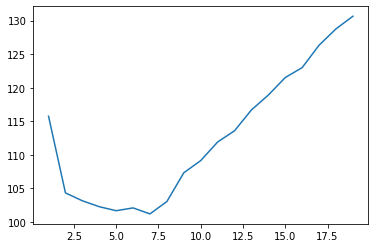

In [147]:
Volume_mean=(statistics.mean(not_scaled_f1.loc[:,'Volume']))
Volume_stdev=(statistics.stdev(not_scaled_f1.loc[:,'Volume']))
Volume_z= (not_scaled_f1.loc[:,'Volume']-Volume_mean)/Volume_stdev
outliers=[]
for i in Volume_z:
  if i>3 or i<-3:
    outliers.append(i)
print(len(outliers))


rms_sc=[]
K_neighbor=[i for i in range(1,20)]
for K in K_neighbor:
  model = neighbors.KNeighborsRegressor(n_neighbors = K)
  model.fit(X_sctrain,Y_sctrain)
  pred=model.predict(X_sctest)
  rms_sc.append(math.sqrt(mean_squared_error(Y_sctest,pred)))
plt.plot(K_neighbor,rms_sc)

In [148]:
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 7)
model_knn.fit(X_sctrain,Y_sctrain)
pred_knn=model_knn.predict(X_sctest)
error_list(Y_sctest,pred_knn,4)

r2 score for 4 vars is:  0.9999789184675489
RMSE score for 4 vars is:  101.21368216591199
MAPE score for 4 vars is:  [0.03763835]
MBE score for 4 vars is:  [10.35174269]


# **Neural Networks**

In [149]:
annmodel = Sequential()
annmodel.add(Dense(units = 4, input_dim = 4, activation = 'relu'))
annmodel.add(Dense(units = 3, activation = 'relu'))
annmodel.add(Dense(units = 1, activation = 'relu'))
annmodel.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.6))
h = annmodel.fit(fo_train, f2_train, batch_size=300, epochs=10, verbose=0)
ann_pred = annmodel.predict(fo_test)
error_list(f2_test, ann_pred, 4)

annmodel6 = Sequential()
annmodel6.add(Dense(units = 4, input_dim = 6, activation = 'relu'))
annmodel.add(Dense(units = 3, activation = 'relu'))
annmodel6.add(Dense(units = 1, activation = 'relu'))
annmodel6.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9))
h = annmodel6.fit(f1_train, f2_train, batch_size=300, epochs=10, verbose=0)
ann_pred6 = annmodel6.predict(f1_test)
error_list(f2_test, ann_pred6, 6)

r2 score for 4 vars is:  -3.073356343308298e-05
RMSE score for 4 vars is:  0.9815847969570414
MAPE score for 4 vars is:  [1.]
MBE score for 4 vars is:  [0.20625625]
r2 score for 6 vars is:  -2.353820425282625
RMSE score for 6 vars is:  1.7975916925710616
MAPE score for 6 vars is:  [1.00871182]
MBE score for 6 vars is:  [0.28854026]


**Taking output using best regressor.**

In [223]:
nfo_train, nfo_test, nf2_train, nf2_test = train_test_split(nfo1,nf2, test_size = 0.2, random_state = 0)
linear_fo = LinearRegression().fit(nfo_train, nf2_train)
prediction = linear_fo.predict(fo3)


In [224]:
dates = []
string = 'd'
for i in range(len(prediction)):
  s = string + str(i+1)
  dates.append(s)
dates = np.array(dates)
prediction = np.array(prediction)

In [249]:
Output1 = pd.DataFrame(dates, columns = None)
Output2 = pd.DataFrame(prediction, columns = None)
Output = pd.merge(Output1,Output2, left_index = True, right_index = True)

In [256]:
Output.to_csv('Eshan_Kale_text.txt', header = None, index = None, sep = ',')

In [243]:
print(Output1, Output2)

         Date
0          d1
1          d2
2          d3
3          d4
4          d5
...       ...
10855  d10856
10856  d10857
10857  d10858
10858  d10859
10859  d10860

[10860 rows x 1 columns]              pred
0       26.202346
1       94.511814
2       55.082437
3      124.286092
4       20.728026
...           ...
10855   51.321801
10856   40.131989
10857   22.546762
10858   33.852326
10859   90.737007

[10860 rows x 1 columns]
